## PyTorchによる非線形関数近似（y = ax^2 + b）のサンプル

このJupyter Notebookでは、PyTorchを用いて、与えられたデータ（x, y）から、関数 `y = ax^2 + b` をニューラルネットワークで近似する方法を解説します。

**1. 必要なライブラリのインポート**

まず、PyTorchとその関連ライブラリをインポートします。

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

*   `torch`: PyTorchの基本的な機能を提供します。
*   `torch.nn`: ニューラルネットワークの構築に必要なモジュール（レイヤーなど）が含まれます。
*   `torch.optim`: 最適化アルゴリズム（学習方法）を提供します。
*   `numpy`: 数値計算ライブラリです。データの生成や処理に利用します。
*   `matplotlib.pyplot`: グラフ描画ライブラリです。結果の可視化に利用します。

**2. データの生成**

`y = ax^2 + b` の形式に従うデータを人工的に生成します。

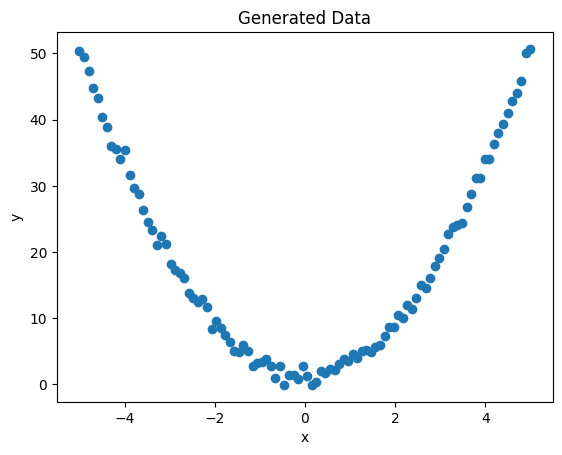

In [4]:
# 真のパラメータ（aとb）
true_a = 2.0
true_b = 1.0

# xの範囲とデータ数
x_start = -5
x_end = 5
num_samples = 100

# xの値を生成
x = np.linspace(x_start, x_end, num_samples)

# ノイズを加えたyの値を生成
noise = np.random.normal(0, 1, num_samples)  # 平均0、標準偏差1のノイズ
y = true_a * x**2 + true_b + noise

# NumPy配列をPyTorchのTensorに変換
x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1) # (num_samples, 1)の形状にする
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1) # (num_samples, 1)の形状にする

# データの確認
plt.scatter(x.numpy(), y.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

*   `true_a` と `true_b` は、近似したい関数の真のパラメータです。
*   `x` は、入力データです。`np.linspace` で指定された範囲で均等な値が生成されます。
*   `noise` は、生成されたデータに加えるノイズです。より現実的なデータに近づけます。
*   `y` は、目標出力データです。`y = ax^2 + b + noise` で計算されます。
*   `torch.tensor` によって、NumPy配列がPyTorchのTensorに変換されます。  `reshape(-1, 1)`は、Tensorの形状を`(num_samples, 1)`に変更しています。これは、ニューラルネットワークの入力として適切な形式にするためです。
*   最後に、生成されたデータを散布図で可視化します。

**3. ニューラルネットワークの定義**

`y = ax^2 + b` を近似するニューラルネットワークを定義します。ここでは、非常に単純なネットワークとして、入力層、隠れ層（ReLU活性化関数）、出力層を持つ1層のニューラルネットワークを使用します。

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) # input_size -> hidden_size
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size) # hidden_size -> output_size

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# ハイパーパラメータ
input_size = 1  # 入力次元（xの値）
hidden_size = 10 # 隠れ層のニューロン数
output_size = 1 # 出力次元（yの値）
learning_rate = 0.01 # 学習率

# モデルのインスタンス化
model = Net(input_size, hidden_size, output_size)

*   `Net` クラスは、ニューラルネットワークの構造を定義します。
    *   `__init__` メソッドで、各層を定義します。
        *   `nn.Linear(input_size, hidden_size)` は、入力層から隠れ層への線形変換を行う層です。
        *   `nn.ReLU()` は、ReLU活性化関数を適用する層です。
        *   `nn.Linear(hidden_size, output_size)` は、隠れ層から出力層への線形変換を行う層です。
    *   `forward` メソッドは、順伝播を定義します。入力 `x` がどのようにネットワークを通過して出力されるかを記述します。
*   `input_size`, `hidden_size`, `output_size` は、ネットワークの構造を決定するハイパーパラメータです。
*   `learning_rate` は、学習の進み具合を調整するハイパーパラメータです。
*   `model` は、定義したニューラルネットワークのインスタンスです。

**4. 損失関数と最適化アルゴリズムの定義**

損失関数（Loss function）と最適化アルゴリズム（Optimizer）を定義します。

In [7]:
# 損失関数（平均二乗誤差）
criterion = nn.MSELoss()

# 最適化アルゴリズム（Adam）
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

*   `nn.MSELoss()` は、平均二乗誤差（Mean Squared Error）を計算する損失関数です。予測値と正解値の差の二乗の平均を計算します。
*   `optim.Adam()` は、Adam（Adaptive Moment Estimation）と呼ばれる最適化アルゴリズムです。学習率を自動的に調整し、効率的な学習を可能にします。  `model.parameters()`は、学習対象となるモデルのパラメータ（重みとバイアス）をoptimizerに渡します。

**5. 学習**

ニューラルネットワークを学習させます。

In [9]:
# 学習エポック数
num_epochs = 1000

# 学習ループ
for epoch in range(num_epochs):
    # 順伝播
    outputs = model(x)
    loss = criterion(outputs, y)

    # 逆伝播とパラメータ更新
    optimizer.zero_grad() # 勾配をゼロに初期化
    loss.backward() # 逆伝播
    optimizer.step() # パラメータ更新

    # 100エポックごとに損失を表示
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 78.0408
Epoch [200/1000], Loss: 36.1459
Epoch [300/1000], Loss: 24.1020
Epoch [400/1000], Loss: 16.1674
Epoch [500/1000], Loss: 10.8685
Epoch [600/1000], Loss: 7.5440
Epoch [700/1000], Loss: 5.5215
Epoch [800/1000], Loss: 4.2231
Epoch [900/1000], Loss: 3.4122
Epoch [1000/1000], Loss: 2.8379


*   `num_epochs` は、学習を繰り返す回数です。
*   学習ループでは、以下の処理を繰り返します。
    *   `outputs = model(x)`: 入力 `x` をニューラルネットワークに入力し、予測値 `outputs` を計算します（順伝播）。
    *   `loss = criterion(outputs, y)`: 予測値 `outputs` と正解値 `y` の間の損失を計算します。
    *   `optimizer.zero_grad()`: 勾配をゼロに初期化します。これは、PyTorchでは勾配が累積されるため、新しい反復の前にリセットする必要があります。
    *   `loss.backward()`: 損失関数の勾配を計算します（逆伝播）。
    *   `optimizer.step()`: 計算された勾配に基づいて、モデルのパラメータを更新します。
    *   100エポックごとに、現在の損失を表示します。

**6. 結果の可視化**

学習結果を可視化します。

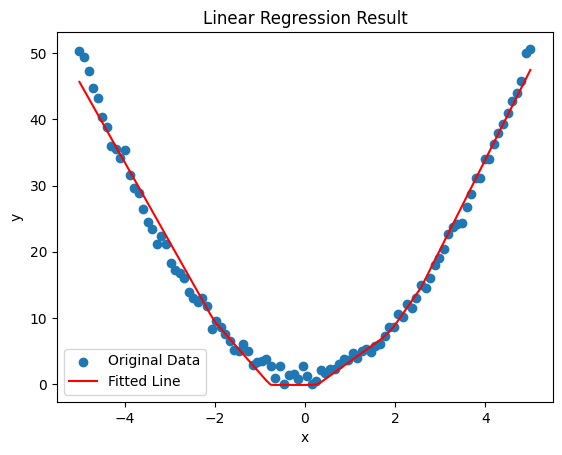

In [10]:
# モデルによる予測
predicted = model(x).detach().numpy() # detach() で計算グラフから切り離し、NumPy配列に変換

# グラフ描画
plt.scatter(x.numpy(), y.numpy(), label='Original Data')
plt.plot(x.numpy(), predicted, label='Fitted Line', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Result")
plt.legend()
plt.show()

*   `predicted = model(x).detach().numpy()`: 学習済みのモデルに `x` を入力し、予測値を計算します。 `detach()` は、計算グラフからTensorを切り離し、勾配の計算を停止します。
*   元のデータと予測された曲線をグラフに重ねて表示します。

**7. 学習済みパラメータの確認**

学習済みパラメータを確認することで、モデルがどのような関数を学習したのかを理解できます。

In [11]:
for name, param in model.named_parameters():
    print(name, param.data)

fc1.weight tensor([[-2.2768],
        [ 0.1245],
        [-0.1573],
        [ 1.6138],
        [-2.4344],
        [-2.0938],
        [ 1.8089],
        [ 1.7500],
        [ 1.6142],
        [ 1.5131]])
fc1.bias tensor([-1.7954, -0.7216, -0.9200, -3.1327, -1.8284, -4.2100, -0.5436, -4.5074,
        -0.3696, -2.5851])
fc2.weight tensor([[1.8084, 0.1984, 0.0037, 2.0814, 1.5050, 2.0659, 1.5926, 2.1706, 1.2394,
         1.0211]])
fc2.bias tensor([-0.1551])


これにより、`fc1.weight`, `fc1.bias`, `fc2.weight`, `fc2.bias` の値が出力されます。これらの値は、モデルが学習した関数の形状を決定する重要な要素です。今回のモデルは、入力層と出力層がそれぞれ1次元であるため、`fc1.weight` と `fc2.weight` は1次元のTensorとして、`fc1.bias` と `fc2.bias` はスカラー値として表示されます。これらの値を分析することで、モデルが元の関数 `y = ax^2 + b` をどのように近似しているかを考察できます。

**補足**

*   このサンプルは、非常に単純なニューラルネットワークを使用しています。より複雑な関数を近似する場合は、より深いネットワークや、異なる活性化関数を使用する必要があります。
*   ハイパーパラメータ（学習率、エポック数、隠れ層のサイズなど）は、データの特性やネットワークの構造に合わせて調整する必要があります。
*   学習データが少ない場合や、ノイズが多い場合は、過学習が発生する可能性があります。過学習を防ぐためには、正則化手法（L1正則化、L2正則化、ドロップアウトなど）を導入する必要があります。
*   より高度なテクニックとして、ミニバッチ学習やGPUによる高速化などがあります。

## GPUを利用する

上記のコードをGPUが利用できる場合はGPUを利用するように変更します。

Using device: cuda:0


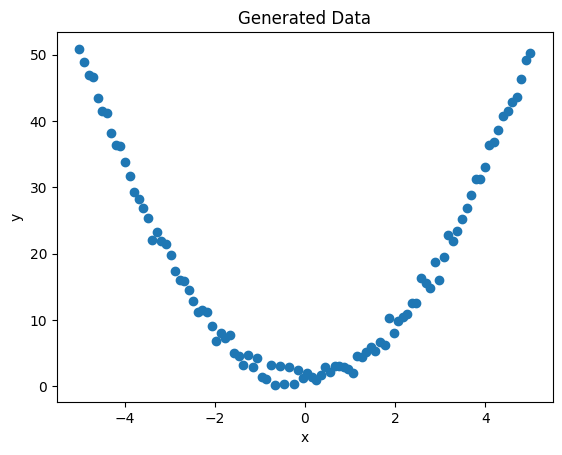

Epoch [100/1000], Loss: 56.9305
Epoch [200/1000], Loss: 32.9321
Epoch [300/1000], Loss: 20.8482
Epoch [400/1000], Loss: 12.8854
Epoch [500/1000], Loss: 7.9317
Epoch [600/1000], Loss: 5.1017
Epoch [700/1000], Loss: 3.5894
Epoch [800/1000], Loss: 2.7423
Epoch [900/1000], Loss: 2.2040
Epoch [1000/1000], Loss: 1.8520


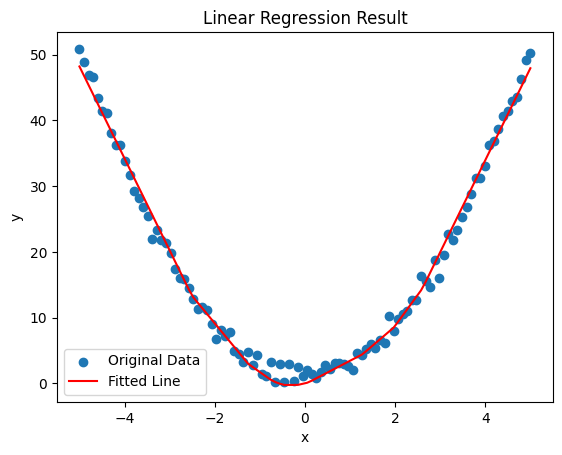

fc1.weight tensor([[ 1.7672e+00],
        [-2.0630e+00],
        [ 2.3997e-04],
        [ 1.9492e+00],
        [ 2.0276e+00],
        [-2.1607e+00],
        [-2.1558e+00],
        [ 1.4071e+00],
        [-2.1439e+00],
        [ 1.8853e+00]], device='cuda:0')
fc1.bias tensor([-3.4940, -0.9958, -0.4525, -2.4903, -0.1512, -2.7117, -1.5404,  0.2236,
        -5.3809, -4.9119], device='cuda:0')
fc2.weight tensor([[1.9780, 1.2157, 0.0072, 1.1820, 0.9805, 1.6149, 1.0715, 1.1227, 2.6440,
         2.4496]], device='cuda:0')
fc2.bias tensor([-0.2185], device='cuda:0')


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# GPUが利用可能かどうか確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# データの生成
true_a = 2.0
true_b = 1.0
x_start = -5
x_end = 5
num_samples = 100

x = np.linspace(x_start, x_end, num_samples)
noise = np.random.normal(0, 1, num_samples)
y = true_a * x**2 + true_b + noise

x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1).to(device) # GPUに転送
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1).to(device) # GPUに転送

plt.scatter(x.cpu().numpy(), y.cpu().numpy())  # CPUに転送してプロット
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# ハイパーパラメータ
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01

# モデルのインスタンス化とGPUへの転送
model = Net(input_size, hidden_size, output_size).to(device)

# 損失関数と最適化アルゴリズムの定義
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 学習
num_epochs = 1000

for epoch in range(num_epochs):
    # 順伝播
    outputs = model(x)
    loss = criterion(outputs, y)

    # 逆伝播とパラメータ更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 結果の可視化
predicted = model(x).detach().cpu().numpy() # GPUからCPUに転送してNumPy配列に変換

plt.scatter(x.cpu().numpy(), y.cpu().numpy(), label='Original Data') # CPUに転送してプロット
plt.plot(x.cpu().numpy(), predicted, label='Fitted Line', color='red') # CPUに転送してプロット
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Result")
plt.legend()
plt.show()

# 学習済みパラメータの確認
for name, param in model.named_parameters():
    print(name, param.data)

**変更点と説明:**

1.  **デバイスの確認と設定:**
    ```python
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    ```
    `torch.cuda.is_available()` でGPUが利用可能かどうかを確認し、利用可能な場合は `"cuda:0"` (最初のGPU) を、そうでない場合は `"cpu"` を `device` 変数に設定します。  `print(f"Using device: {device}")`でどのデバイスを使用しているかを確認できます。

2.  **データのGPUへの転送:**
    ```python
    x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1).to(device)
    y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1).to(device)
    ```
    `x` と `y` をTensorに変換した後、`.to(device)` を使用してGPUに転送します。

3.  **モデルのGPUへの転送:**
    ```python
    model = Net(input_size, hidden_size, output_size).to(device)
    ```
    モデルのインスタンスを作成した後、`.to(device)` を使用してGPUに転送します。

4.  **結果の可視化のためのCPUへの転送:**
    ```python
    predicted = model(x).detach().cpu().numpy()
    plt.scatter(x.cpu().numpy(), y.cpu().numpy(), label='Original Data')
    plt.plot(x.cpu().numpy(), predicted, label='Fitted Line', color='red')
    ```
    NumPyやMatplotlibはGPU上のTensorを直接扱うことができないため、予測結果や元のデータを `.cpu()` を使用してCPUに転送してからNumPy配列に変換し、プロットする必要があります。

**重要な注意点:**

*   **GPUの利用:**  このコードは、PyTorchがGPUを利用できる環境でのみGPUを使用します。GPUが利用できない場合は、自動的にCPUで実行されます。
*   **メモリ:**  GPUメモリには限りがあるため、大規模なデータセットを使用する場合は、メモリ不足に注意する必要があります。
*   **実行速度:** GPUを使用すると、特に大きなモデルやデータセットの場合、学習時間が大幅に短縮される可能性があります。
*   **CUDAのインストール:**  GPUを使用するためには、CUDA Toolkitをインストールし、PyTorchがCUDAを認識できるように設定する必要があります。PyTorchのインストール時に適切なCUDAバージョンを選択してください。

この修正されたコードは、GPUが利用可能な場合はGPUを使用し、そうでない場合はCPUを使用するように動作します。